In [1]:
# Data 
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv('train_values.csv')
target = pd.read_csv('train_labels.csv')
features.head()
#features.info()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [2]:
features.shape

(260601, 39)

In [47]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [59]:
columns_names = features.columns
categorical = columns_names[8:15] +[columns_names[26]]
numerical = [name for name in columns_names if name not in categorical]
numerical

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_of

In [3]:
target.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [34]:
#target['damage_grade'].plot(kind = 'bar')
counts_target = target['damage_grade'].value_counts()
counts_foundation_type = features['foundation_type'].value_counts()
counts_foundation_type

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

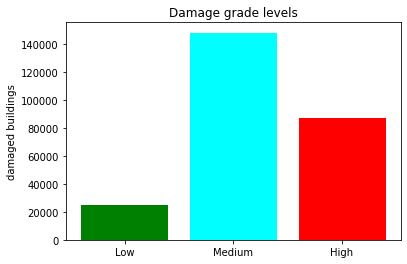

In [22]:
plt.bar([2,3,1],list(counts),color=['cyan', 'red', 'green'])
plt.xticks([2,3,1], ['Medium','High','Low'])
plt.ylabel('damaged buildings')
plt.title('Damage grade levels')
plt.savefig('repartition.png')


In [5]:
import random
# let's use only 10% of the available data to do the analysis
# so the number of the data points would be 2600 instead of 26 000
# we choose this sample randomly from the data.

indeces = random.sample(range(26000),2600)

sample_features = features.iloc[indeces]
sample_target = target.iloc[indeces]

sample_features.shape

(2600, 39)

Before we start modeling the phenomenen it sounds crucial to check out the data first !
At first there exist 39 features to describe the damage level for a building, this information is provided for more than 26 000 building wich makes it an important amount of data.

#------------ The problem -------------------------------------------------------
Given some  construction and location charactiristics of a building, what is the level of damage that may cause an earthquake ?

#------------ Business interest -------------------------------------------------
Answering a question as the one above may serve many interests for example, it may help the insurance companies to tune the best formula to cover a natural disater for thier client, or to help local othoroties to deside whether to build a given structure in a location or not, we can also use the model to find the best charactiristics for a building in a given location.

#------------ What is a damage level ? --------------------------------------------
Using the column 'damage_grade' of the target data we can see that there exist three grades (1,2 and 3), they can also be described as low, medium and high level damage, 'réparti' as follow:

The first thing we can see is that the data is not balanced, which means we need to be more precausious while deciding the performance metric, and taking this imbalce into account while tuning the model.

#----------------Checking for missing values ----------------------------------------





In [23]:
features.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [24]:
target.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

Fortunatlly there is no missing values in our data (at least those which pandas can detect)

Is there any Outliers ?


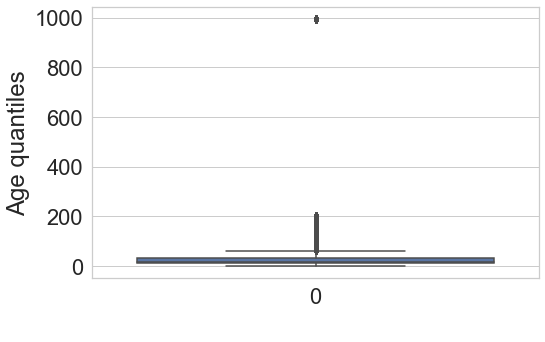

In [46]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=2, rc={"figure.figsize": [8, 5]})
sns.boxplot(data = features['age']).set(xlabel=' ', ylabel='Age quantiles')
plt.savefig('ageoutlier.png')

for the age feature we see that there is a building with an age of about 1000 years, which seems unrealistic, but what matters for us is that such an a outlier may ruin our analysis and predcition so it's may be wise removing it.

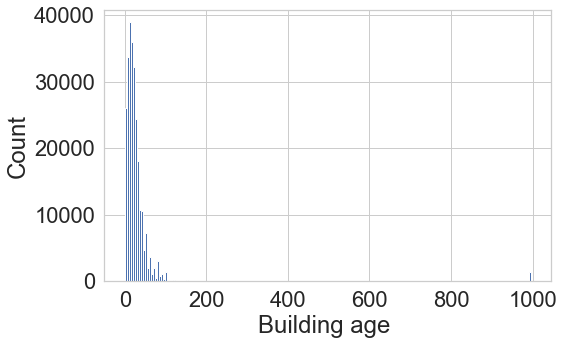

In [44]:
sns.set(style='whitegrid', palette="deep", font_scale=2, rc={"figure.figsize": [8, 5]})
sns.distplot(
    features['age'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Building age ', ylabel='Count')
plt.savefig('agedistribution.png')